# Movie review classifier

In [35]:
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

In [20]:
%matplotlib inline

## Read the data

Define the folder where the data is

In [2]:
data_dir = os.path.join("data", "train")

In [3]:
data_dir

'data\\train'

List all the files in the directory

In [5]:
file_names = os.listdir(data_dir)

In [6]:
len(file_names)

10000

In [7]:
file_names[0]

'reviews0.txt'

Each document in the training data set will be on the following format:
- First line: The label (score given to this review)
- Second line: The title of the review
- All other lines: The movie review text

In [12]:
documents, labels = [], []
for file_name in file_names:
    with open(os.path.join(data_dir, file_name), encoding='utf8') as f:
        labels.append(int(next(f)))
        documents.append(f.read())

In [13]:
len(documents)

10000

In [14]:
len(labels)

10000

Plotting the label distribution

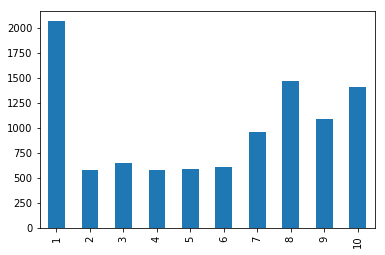

In [25]:
pd.Series(labels).value_counts().sort_index().plot.bar()

Make the labels binary. All reviews with a score >= 7 will be considered good, all other reviews will be considered bad

In [89]:
labels_binary = ["positive" if x >= 7 else "negative" for x in labels]

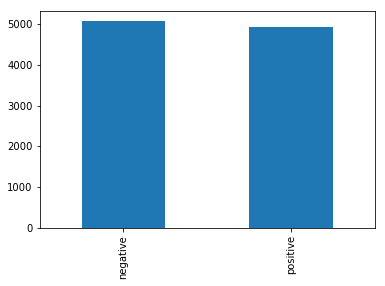

In [90]:
pd.Series(labels_binary).value_counts().sort_index().plot.bar()

# Create a classifier

## Train/test split of data

To properly evaluate the performance of the model, we should split the data into a training set and a test set.

In [91]:
splitter = StratifiedShuffleSplit(n_splits=1)

In [92]:
train_index, test_index = next(StratifiedShuffleSplit().split(documents, labels_binary))
    

In [93]:
len(train_index)

9000

In [94]:
len(test_index)

1000

Convert the documents to numpy objects, for easier indexing

In [95]:
documents = np.asarray(documents)
labels_binary = np.asarray(labels_binary)

In [96]:
documents_train = documents[train_index]
documents_test = documents[test_index]
labels_train = labels_binary[train_index]
labels_test = labels_binary[test_index]

Create the vectorizer, which is used to transform the texts to numbers

In [46]:
vec = CountVectorizer()

Transform the training data

In [97]:
X_train = vec.fit_transform(documents_train)

Fit the classification model on the training data

In [98]:
clf = LogisticRegression()

In [99]:
clf.fit(X_train, labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [100]:
X_test = vec.transform(documents_test)

In [101]:
labels_pred = clf.predict(X_test)

In [103]:
np.average(labels_test == labels_pred)

0.878

In [104]:
i = 1

In [105]:
labels_pred[i]

'positive'

In [107]:
labels_test[i]

'positive'

In [109]:
print(documents_test[i])

What seems to be a silly premise evolved into something even more trifling. But with its unbearable charm, it worked astonishingly well.

Your Name (Kimi No Na Wa) tells the story of two teenagers with vastly
different backgrounds. One is a boy who lived in Tokyo and has the word
"city" described all around him. One is a girl who lived in rural town
far from technology and anything interesting. One morning, somehow,
they found out that they have swapped bodies. Together, they must help
each other find solution in daily life problems, and solve the mystery
of the reason why this whole conundrum started.This may sound like your typical body-swap romantic comedy situation,
but you may find yourself on the wrong side of the spectrum as this
movie takes you into an incredible journey. With a storytelling so
divine, complex, yet understandable, this movie captures the essence of
what romantic comedy movies have lost nowadays, a heart and a charm to
lure you in.Japanese animation movies tend 

Paste any review from IMDB or somewhere else here, to test the classifier

In [111]:
new_review = """
Tied for the best movie I have ever seen

Why do I want to write the 234th comment on The Shawshank Redemption? I am not sure - almost everything that could be possibly said about it has been said. But like so many other people who wrote comments, I was and am profoundly moved by this simple and eloquent depiction of hope and friendship and redemption. 

The only other movie I have ever seen that effects me as strongly is To Kill a Mockingbird. Both movies leave me feeling cleaner for having watched them.

I didn't intend to see this movie at all: I do not like prison movies and I don't normally watch them. I work at a branch library and one day as I was checking The Shawshank Redemption out to one of our older patrons, she said to me, "Whenever I feel down or depressed, I check out this movie and watch it and it always makes me feel better." At the time, I thought that was very strange. One day there was nothing on TV except things I absolutely would not watch under any circumstance or things that I had seen too many times already. I remembered what she said, so I watched it. I have watched it many many times since then and it gets better with every showing.

No action, no special effects - just men in prison uniforms talking to each other.

The Shawshank Redemption and To Kill a Mockingbird are the best movies I have ever seen. I do not judge it by it's technical merits - I don't really care about that. I have read that Citizen Kane or The Godfather or this or that movie is the best movie ever made. They may have the best technique or be the most influential motion pictures ever made, but not the best. The best movies are ones that touch the soul. It takes a movie like The Shawshank Redemption to touch the soul.
"""

In [112]:
X_new_review = vec.transform([new_review])

The actual score of this review was 10 stars

In [113]:
clf.predict(X_new_review)[0]

'positive'

## Combining the vectorizer and the classifier

You probably understand that every time we want to classify a review, or train our model on reviews, we need to convert them to numbers. So, the tranformation from text -> numbers should be part of our model. We can achieve this by combining the vectorizer and the classifier into a pipeline.

In [114]:
from sklearn.pipeline import make_pipeline

In [115]:
pipeline = make_pipeline(vec, clf)

In [118]:
pipeline.fit(documents_train, labels_train)

Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [ ]:
labels_pred = pipeline.predict(documents_test)

In [117]:
pipeline.predict([new_review])[0]

'positive'